In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Series

In [3]:
s = pd.Series(np.random.randn(4), name='daily returns')
s

0    0.669283
1   -0.400773
2    0.602608
3    0.732097
Name: daily returns, dtype: float64

In [4]:
s * 100

0    66.928340
1   -40.077277
2    60.260839
3    73.209685
Name: daily returns, dtype: float64

In [8]:
np.abs(s)

0    0.669283
1    0.400773
2    0.602608
3    0.732097
Name: daily returns, dtype: float64

In [9]:
s.describe()

count    4.000000
mean     0.400804
std      0.536994
min     -0.400773
25%      0.351763
50%      0.635946
75%      0.684987
max      0.732097
Name: daily returns, dtype: float64

In [10]:
s.index = ['AMZN', 'AAPL', 'MSFT', 'GOOG']
s

AMZN    0.669283
AAPL   -0.400773
MSFT    0.602608
GOOG    0.732097
Name: daily returns, dtype: float64

In [11]:
s['AMZN']

0.66928340331009994

In [12]:
s['AMZN'] = 0
s

AMZN    0.000000
AAPL   -0.400773
MSFT    0.602608
GOOG    0.732097
Name: daily returns, dtype: float64

DataFrames

In [15]:
%pwd

'C:\\Users\\Akshay\\Desktop\\PyFinance'

In [16]:
df = pd.read_csv('https://github.com/QuantEcon/QuantEcon.lectures.code/raw/master/pandas/data/test_pwt.csv')
type(df)

pandas.core.frame.DataFrame

In [17]:
df

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.653,0.999500,2.950722e+05,75.716805,5.578804
1,Australia,AUS,2000,19053.186,1.724830,5.418047e+05,67.759026,6.720098
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954
5,South Africa,ZAF,2000,45064.098,6.939830,2.272424e+05,72.718710,5.726546
6,United States,USA,2000,282171.957,1.000000,9.898700e+06,72.347054,6.032454
7,Uruguay,URY,2000,3219.793,12.099592,2.525596e+04,78.978740,5.108068


In [18]:
df[2:5]

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954


In [19]:
df[['country', 'tcgdp']]

,country,tcgdp
0,Argentina,2.950722e+05
1,Australia,5.418047e+05
2,India,1.728144e+06
3,Israel,1.292539e+05
4,Malawi,5.026222e+03
5,South Africa,2.272424e+05
6,United States,9.898700e+06
7,Uruguay,2.525596e+04


To select both rows and columns using integers, the iloc attribute should be used with the format .iloc[rows,columns]

In [20]:
df.iloc[2:5, 0:4]

,country,country isocode,year,POP
2,India,IND,2000,1006300.297
3,Israel,ISR,2000,6114.570
4,Malawi,MWI,2000,11801.505


To select rows and columns using a mixture of integers and labels, the loc attribute can be used in a similar way

In [21]:
df.loc[df.index[2:5], ['country', 'tcgdp']]

,country,tcgdp
2,India,1.728144e+06
3,Israel,1.292539e+05
4,Malawi,5.026222e+03


In [22]:
df = df[['country', 'POP', 'tcgdp']]
df

,country,POP,tcgdp
0,Argentina,37335.653,2.950722e+05
1,Australia,19053.186,5.418047e+05
2,India,1006300.297,1.728144e+06
3,Israel,6114.570,1.292539e+05
4,Malawi,11801.505,5.026222e+03
5,South Africa,45064.098,2.272424e+05
6,United States,282171.957,9.898700e+06
7,Uruguay,3219.793,2.525596e+04


In [23]:
df = df.set_index('country')
df

,POP,tcgdp
country,,
Argentina,37335.653,2.950722e+05
Australia,19053.186,5.418047e+05
India,1006300.297,1.728144e+06
Israel,6114.570,1.292539e+05
Malawi,11801.505,5.026222e+03
South Africa,45064.098,2.272424e+05
United States,282171.957,9.898700e+06
Uruguay,3219.793,2.525596e+04


In [24]:
df.columns = 'population', 'total GDP'
df

,population,total GDP
country,,
Argentina,37335.653,2.950722e+05
Australia,19053.186,5.418047e+05
India,1006300.297,1.728144e+06
Israel,6114.570,1.292539e+05
Malawi,11801.505,5.026222e+03
South Africa,45064.098,2.272424e+05
United States,282171.957,9.898700e+06
Uruguay,3219.793,2.525596e+04


In [25]:
df['population'] = df['population'] * 1e3
df

,population,total GDP
country,,
Argentina,3.733565e+07,2.950722e+05
Australia,1.905319e+07,5.418047e+05
India,1.006300e+09,1.728144e+06
Israel,6.114570e+06,1.292539e+05
Malawi,1.180150e+07,5.026222e+03
South Africa,4.506410e+07,2.272424e+05
United States,2.821720e+08,9.898700e+06
Uruguay,3.219793e+06,2.525596e+04


In [26]:
df['GDP percap'] = df['total GDP'] * 1e6 / df['population']
df

,population,total GDP,GDP percap
country,,,
Argentina,3.733565e+07,2.950722e+05,7903.229085
Australia,1.905319e+07,5.418047e+05,28436.433261
India,1.006300e+09,1.728144e+06,1717.324719
Israel,6.114570e+06,1.292539e+05,21138.672749
Malawi,1.180150e+07,5.026222e+03,425.896679
South Africa,4.506410e+07,2.272424e+05,5042.647686
United States,2.821720e+08,9.898700e+06,35080.381854
Uruguay,3.219793e+06,2.525596e+04,7843.970620


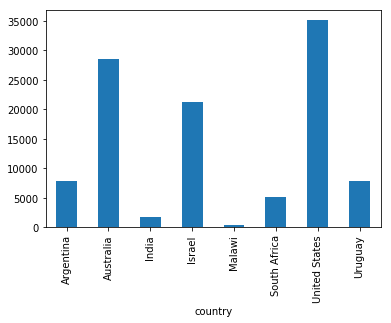

In [32]:
df['GDP percap'].plot(kind='bar')
plt.show()

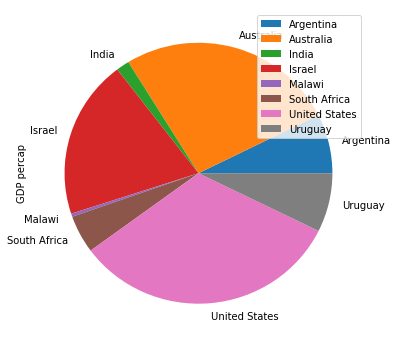

In [35]:
 plot = df.plot.pie(y='GDP percap', figsize=(6, 6))

Accessing Data with requests

In [37]:
import requests

url = 'http://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv'
source = requests.get(url).content.decode().split("\n")
source[0]

'DATE,VALUE\r'

In [38]:
source[1]

'1948-01-01,3.4\r'

In [51]:
data = pd.read_csv(url, index_col=0, parse_dates=True)

In [40]:
type(data)


pandas.core.frame.DataFrame

In [52]:
data.head()

,VALUE
DATE,
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5


In [53]:
pd.set_option('precision', 1)
data.describe()

,VALUE
count,853.0
mean,5.8
std,1.6
min,2.5
25%,4.6
50%,5.6
75%,6.8
max,10.8


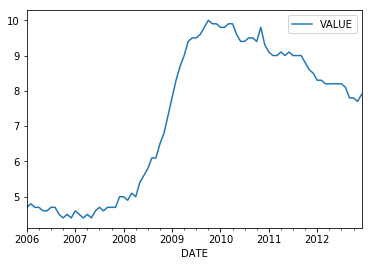

In [55]:
data['2006':'2012'].plot()
plt.show()

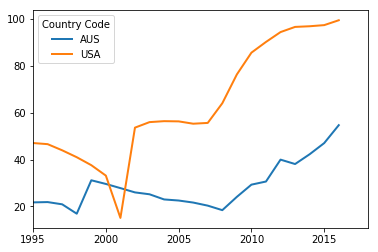

In [56]:
import matplotlib.pyplot as plt
import requests
import pandas as pd

# == Get data and read into file gd.xls == #
wb_data_query = "http://api.worldbank.org/v2/en/indicator/gc.dod.totl.gd.zs?downloadformat=excel"
r = requests.get(wb_data_query)
with open('gd.xls', 'wb') as output:
    output.write(r.content)

# == Parse data into a DataFrame == #
govt_debt = pd.read_excel('gd.xls', sheet_name='Data', skiprows=3, index_col=1)

# == Take desired values and plot == #
govt_debt = govt_debt.transpose()
govt_debt = govt_debt[['AUS', 'USA']]
govt_debt = govt_debt[38:]
govt_debt.plot(lw=2)
plt.show()

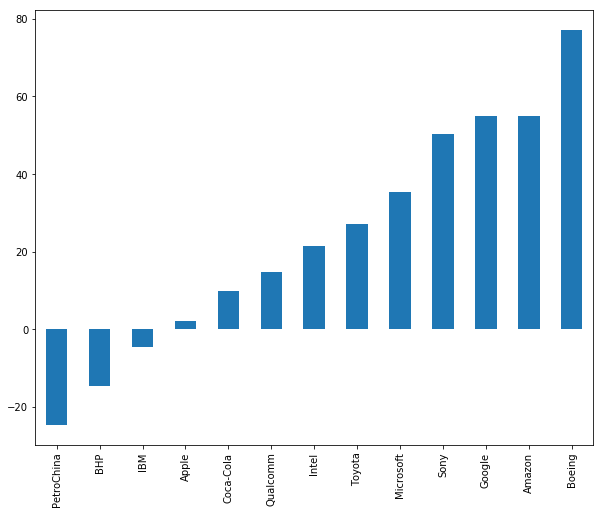

In [71]:
ticker = pd.read_csv('https://github.com/QuantEcon/QuantEcon.lectures.code/raw/master/pandas/data/ticker_data.csv')
ticker.set_index('Date', inplace=True)

ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               'SNE': 'Sony',
               'PTR': 'PetroChina'}

price_change = pd.Series()

for tick in ticker_list:
    change = 100 * (ticker.loc[ticker.index[-1], tick] - ticker.loc[ticker.index[0], tick]) / ticker.loc[ticker.index[0], tick]
    name = ticker_list[tick]
    price_change[name] = change
    

price_change.sort_values(inplace=True)
fig, ax = plt.subplots(figsize=(10,8))
price_change.plot(kind='bar', ax=ax)
plt.show()



<h2> SLICING AND RESHAPING </h2>

In [1]:
import pandas as pd

# Display 6 columns for viewing purposes
pd.set_option('display.max_columns', 6)

# Reduce decimal points to 2
pd.options.display.float_format = '{:,.2f}'.format

realwage = pd.read_csv('https://github.com/QuantEcon/QuantEcon.lectures.code/raw/master/pandas_panel/realwage.csv')

In [2]:
realwage.head()

,Unnamed: 0,Time,Country,Series,Pay period,value
0,0,2006-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,"17,132.44"
1,1,2007-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,"18,100.92"
2,2,2008-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,"17,747.41"
3,3,2009-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,"18,580.14"
4,4,2010-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,"18,755.83"


In [4]:
realwage = realwage.pivot_table(values = 'value', index = 'Time', columns = ['Country','Series', 'Pay period'])
realwage.head()

Country                                   Australia         \
Series     In 2015 constant prices at 2015 USD PPPs          
Pay period                                   Annual Hourly   
Time                                                         
2006-01-01                                20,410.65  10.33   
2007-01-01                                21,087.57  10.67   
2008-01-01                                20,718.24  10.48   
2009-01-01                                20,984.77  10.62   
2010-01-01                                20,879.33  10.57   

Country                                                        ...    \
Series     In 2015 constant prices at 2015 USD exchange rates  ...     
Pay period                                             Annual  ...     
Time                                                           ...     
2006-01-01                                          23,826.64  ...     
2007-01-01                                          24,616.84  ...     
2008-01-01                                          24,185.70  ...     
2009-01-01                                          24,496.84  ...     
2010-01-01                                          24,373.76  ...     

Country                               United States  \
Series     In 2015 constant prices at 2015 USD PPPs   
Pay period                                   Hourly   
Time                                                  
2006-01-01                                     6.05   
2007-01-01                                     6.24   
2008-01-01                                     6.78   
2009-01-01                                     7.58   
2010-01-01                                     7.88   

Country                                                               
Series     In 2015 constant prices at 2015 USD exchange rates         
Pay period                                             Annual Hourly  
Time                                                                  
2006-01-01                                          12,594.40   6.05  
2007-01-01                                          12,974.40   6.24  
2008-01-01                                          14,097.56   6.78  
2009-01-01                                          15,756.42   7.58  
2010-01-01                                          16,391.31   7.88  

[5 rows x 128 columns]

In [5]:
realwage.index = pd.to_datetime(realwage.index)
type(realwage.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [6]:
type(realwage.columns)

pandas.core.indexes.multi.MultiIndex

In [7]:
realwage.columns.names

FrozenList(['Country', 'Series', 'Pay period'])

In [8]:
realwage['United States'].head()

Series     In 2015 constant prices at 2015 USD PPPs         \
Pay period                                   Annual Hourly   
Time                                                         
2006-01-01                                12,594.40   6.05   
2007-01-01                                12,974.40   6.24   
2008-01-01                                14,097.56   6.78   
2009-01-01                                15,756.42   7.58   
2010-01-01                                16,391.31   7.88   

Series     In 2015 constant prices at 2015 USD exchange rates         
Pay period                                             Annual Hourly  
Time                                                                  
2006-01-01                                          12,594.40   6.05  
2007-01-01                                          12,974.40   6.24  
2008-01-01                                          14,097.56   6.78  
2009-01-01                                          15,756.42   7.58  
2010-01-01                                          16,391.31   7.88

In [9]:
realwage.stack().head()

Country                                              Australia  \
Series                In 2015 constant prices at 2015 USD PPPs   
Time       Pay period                                            
2006-01-01 Annual                                    20,410.65   
           Hourly                                        10.33   
2007-01-01 Annual                                    21,087.57   
           Hourly                                        10.67   
2008-01-01 Annual                                    20,718.24   

Country                                                                   \
Series                In 2015 constant prices at 2015 USD exchange rates   
Time       Pay period                                                      
2006-01-01 Annual                                              23,826.64   
           Hourly                                                  12.06   
2007-01-01 Annual                                              24,616.84   
           Hourly                                                  12.46   
2008-01-01 Annual                                              24,185.70   

Country                                                Belgium  \
Series                In 2015 constant prices at 2015 USD PPPs   
Time       Pay period                                            
2006-01-01 Annual                                    21,042.28   
           Hourly                                        10.09   
2007-01-01 Annual                                    21,310.05   
           Hourly                                        10.22   
2008-01-01 Annual                                    21,416.96   

Country                                      ...                          \
Series                                       ...                           
Time       Pay period                        ...                           
2006-01-01 Annual                            ...                           
           Hourly                            ...                           
2007-01-01 Annual                            ...                           
           Hourly                            ...                           
2008-01-01 Annual                            ...                           

Country                                                   United Kingdom  \
Series                In 2015 constant prices at 2015 USD exchange rates   
Time       Pay period                                                      
2006-01-01 Annual                                              20,376.32   
           Hourly                                                   9.81   
2007-01-01 Annual                                              20,954.13   
           Hourly                                                  10.07   
2008-01-01 Annual                                              20,902.87   

Country                                          United States  \
Series                In 2015 constant prices at 2015 USD PPPs   
Time       Pay period                                            
2006-01-01 Annual                                    12,594.40   
           Hourly                                         6.05   
2007-01-01 Annual                                    12,974.40   
           Hourly                                         6.24   
2008-01-01 Annual                                    14,097.56   

Country                                                                   
Series                In 2015 constant prices at 2015 USD exchange rates  
Time       Pay period                                                     
2006-01-01 Annual                                              12,594.40  
           Hourly                                                   6.05  
2007-01-01 Annual                                              12,974.40  
           Hourly                                                   6.24  
2008-01-01 Annual                                            

In [ ]:
realwaf

<h1> Just_Markham Tutorial Practice <h2>

In [76]:
import pandas as pd
pd.__version__


'0.20.1'

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [97]:
ri = pd.read_csv('C:\\Users\\Akshay\\Desktop\\PyFinance\\pycon-2018-tutorial-master\\police.csv')
pd.set_option('display.max_columns', 15)
ri.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,nan,M,"1,985.00",20.00,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,nan,M,"1,965.00",40.00,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,nan,M,"1,972.00",33.00,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,nan,M,"1,986.00",19.00,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,nan,F,"1,984.00",21.00,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [85]:
ri.shape

(91741, 15)

In [89]:
ri.dtypes

stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

In [90]:
ri.isnull().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [107]:
ri.drop('county_name', axis='columns', inplace=True)

In [108]:
ri.head()
ri.shape

(91741, 14)

In [109]:
ri.dropna(axis='columns', how = 'all').shape

(91741, 14)

In [111]:
ri.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,"1,985.00",20.00,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,"1,965.00",40.00,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,"1,972.00",33.00,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,M,"1,986.00",19.00,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,F,"1,984.00",21.00,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [112]:
ri[ri.violation == "Speeding"].driver_gender.value_counts(normalize = True)

M   0.68
F   0.32
Name: driver_gender, dtype: float64

In [115]:
ri.loc[ri.violation == 'Speeding', 'driver_gender'].value_counts(normalize = True)

0        M
1        M
2        M
4        F
6        M
7        F
8        M
9        M
10       M
11       F
12       M
13       F
14       M
15       M
16       M
18       M
19       F
20       F
23       F
26       M
27       F
28       M
31       M
32       M
34       M
36       F
37       M
38       M
39       M
43       M
        ..
91676    F
91678    M
91679    M
91681    M
91695    M
91697    F
91699    F
91700    F
91701    F
91702    M
91711    M
91712    F
91714    M
91715    F
91717    F
91720    M
91721    M
91722    M
91724    M
91725    F
91726    M
91727    F
91728    F
91731    F
91732    F
91734    M
91735    M
91736    M
91739    M
91740    M
Name: driver_gender, Length: 48463, dtype: object

In [116]:
ri.loc[ri.driver_gender == 'M', 'violation'].value_counts()

Speeding               32979
Moving violation       13020
Equipment               8533
Other                   3627
Registration/plates     2419
Seat belt               2317
Name: violation, dtype: int64

In [118]:
ri[ri.driver_gender == 'M'].violation.value_counts()

Speeding               32979
Moving violation       13020
Equipment               8533
Other                   3627
Registration/plates     2419
Seat belt               2317
Name: violation, dtype: int64

In [119]:
ri.groupby('driver_gender').violation.value_counts(normalize = True)

driver_gender  violation          
F              Speeding              0.66
               Moving violation      0.14
               Equipment             0.11
               Registration/plates   0.04
               Other                 0.03
               Seat belt             0.03
M              Speeding              0.52
               Moving violation      0.21
               Equipment             0.14
               Other                 0.06
               Registration/plates   0.04
               Seat belt             0.04
Name: violation, dtype: float64

In [120]:
ri.search_conducted.value_counts(normalize = True)

False   0.97
True    0.03
Name: search_conducted, dtype: float64

In [121]:
ri.search_conducted.mean()

0.03483720473942948

In [122]:
ri.groupby('driver_gender').search_conducted.mean()

driver_gender
F   0.02
M   0.04
Name: search_conducted, dtype: float64

In [123]:
ri.groupby(['violation', 'driver_gender']).search_conducted.mean()

violation            driver_gender
Equipment            F               0.04
                     M               0.07
Moving violation     F               0.04
                     M               0.06
Other                F               0.06
                     M               0.05
Registration/plates  F               0.07
                     M               0.11
Seat belt            F               0.01
                     M               0.04
Speeding             F               0.01
                     M               0.02
Name: search_conducted, dtype: float64

In [125]:
ri.isnull().sum()

stop_date                 0
stop_time                 0
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [128]:
ri.search_conducted.value_counts()

False    88545
True      3196
Name: search_conducted, dtype: int64

In [130]:
ri[ri.search_conducted == False].search_type.value_counts()

Series([], Name: search_type, dtype: int64)

In [131]:
ri[ri.search_conducted == False].search_type.value_counts(dropna = False)

nan    88545
Name: search_type, dtype: int64

In [132]:
ri[ri.search_conducted == True].search_type.value_counts(dropna=False)

Incident to Arrest                                          1219
Probable Cause                                               891
Inventory                                                    220
Reasonable Suspicion                                         197
Protective Frisk                                             161
Incident to Arrest,Inventory                                 129
Incident to Arrest,Probable Cause                            106
Probable Cause,Reasonable Suspicion                           75
Incident to Arrest,Inventory,Probable Cause                   34
Incident to Arrest,Protective Frisk                           33
Probable Cause,Protective Frisk                               33
Inventory,Probable Cause                                      22
Incident to Arrest,Reasonable Suspicion                       13
Inventory,Protective Frisk                                    11
Protective Frisk,Reasonable Suspicion                         11
Incident to Arrest,Invent

In [135]:
ri['frisk'] = ri.search_type == 'Protective Frisk'
ri.tail()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk
91736,2015-12-31,20:27,M,"1,986.00",29.00,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False,False
91737,2015-12-31,20:35,F,"1,982.00",33.00,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,False
91738,2015-12-31,20:45,M,"1,992.00",23.00,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False,False
91739,2015-12-31,21:42,M,"1,993.00",22.00,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,False
91740,2015-12-31,22:46,M,"1,959.00",56.00,Hispanic,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,False


In [136]:
ri.frisk.sum()

161

In [137]:
ri.frisk.mean()

0.0017549405391264537

In [138]:
ri.frisk.value_counts()

False    91580
True       161
Name: frisk, dtype: int64

In [139]:
ri['frisk'] = ri.search_type.str.contains('Protective Frisk')

In [140]:
ri.frisk.sum()

274

In [141]:
ri.frisk.value_counts(dropna=False)

NaN      88545
False     2922
True       274
Name: frisk, dtype: int64

In [142]:
274/(274 + 2922)

0.08573216520650813

In [144]:
ri.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk
0,2005-01-02,01:55,M,"1,985.00",20.00,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN
1,2005-01-18,08:15,M,"1,965.00",40.00,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN
2,2005-01-23,23:15,M,"1,972.00",33.00,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN
3,2005-02-20,17:15,M,"1,986.00",19.00,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,NaN
4,2005-03-14,10:00,F,"1,984.00",21.00,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN


In [150]:
ri.stop_date.str.slice(0,4).value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_date, dtype: int64

In [151]:
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')
ri['stop_datetime'] = pd.to_datetime(combined)
ri.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,...,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk,stop_datetime
0,2005-01-02,01:55,M,"1,985.00",20.00,White,Speeding,...,NaN,Citation,False,0-15 Min,False,NaN,2005-01-02 01:55:00
1,2005-01-18,08:15,M,"1,965.00",40.00,White,Speeding,...,NaN,Citation,False,0-15 Min,False,NaN,2005-01-18 08:15:00
2,2005-01-23,23:15,M,"1,972.00",33.00,White,Speeding,...,NaN,Citation,False,0-15 Min,False,NaN,2005-01-23 23:15:00
3,2005-02-20,17:15,M,"1,986.00",19.00,White,Call for Service,...,NaN,Arrest Driver,True,16-30 Min,False,NaN,2005-02-20 17:15:00
4,2005-03-14,10:00,F,"1,984.00",21.00,White,Speeding,...,NaN,Citation,False,0-15 Min,False,NaN,2005-03-14 10:00:00


In [152]:
ri.stop_datetime.dt.year.value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_datetime, dtype: int64

In [153]:
ri.drugs_related_stop.dtype


dtype('bool')

In [154]:
ri.drugs_related_stop.mean()

0.008883705213590434

In [155]:
ri.groupby(ri.stop_datetime.dt.hour).drugs_related_stop.mean()

stop_datetime
0    0.02
1    0.01
2    0.02
3    0.02
4    0.01
5    0.00
6    0.00
7    0.00
8    0.00
9    0.01
10   0.01
11   0.01
12   0.00
13   0.01
14   0.01
15   0.01
16   0.01
17   0.01
18   0.01
19   0.01
20   0.01
21   0.01
22   0.01
23   0.02
Name: drugs_related_stop, dtype: float64

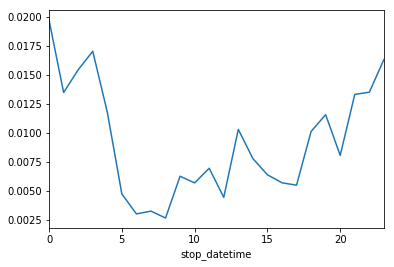

In [157]:
ri.groupby(ri.stop_datetime.dt.hour).drugs_related_stop.mean().plot()

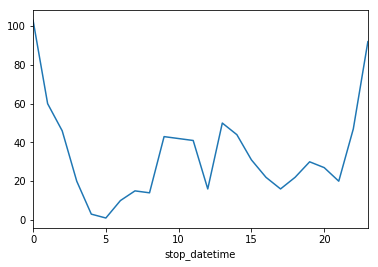

In [159]:
ri.groupby(ri.stop_datetime.dt.hour).drugs_related_stop.sum().plot()

In [160]:
ri.stop_datetime.dt.hour.value_counts()

10    7350
9     6838
11    5877
14    5634
23    5629
0     5221
8     5210
13    4842
15    4832
7     4572
1     4442
16    3844
12    3582
22    3473
20    3340
6     3290
2     2975
17    2900
19    2587
18    2168
21    1499
3     1172
4      254
5      210
Name: stop_datetime, dtype: int64

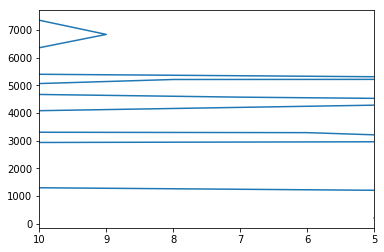

In [161]:
ri.stop_datetime.dt.hour.value_counts().plot()

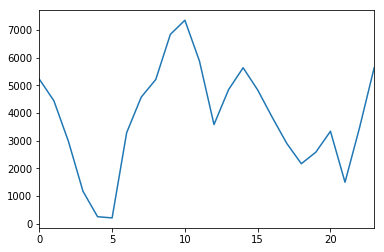

In [165]:
ri.stop_datetime.dt.hour.value_counts().sort_index().plot()

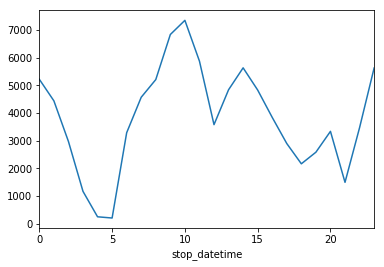

In [167]:
ri.groupby(ri.stop_datetime.dt.hour).stop_date.count().plot()

In [168]:
ri.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,...,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk,stop_datetime
0,2005-01-02,01:55,M,"1,985.00",20.00,White,Speeding,...,NaN,Citation,False,0-15 Min,False,NaN,2005-01-02 01:55:00
1,2005-01-18,08:15,M,"1,965.00",40.00,White,Speeding,...,NaN,Citation,False,0-15 Min,False,NaN,2005-01-18 08:15:00
2,2005-01-23,23:15,M,"1,972.00",33.00,White,Speeding,...,NaN,Citation,False,0-15 Min,False,NaN,2005-01-23 23:15:00
3,2005-02-20,17:15,M,"1,986.00",19.00,White,Call for Service,...,NaN,Arrest Driver,True,16-30 Min,False,NaN,2005-02-20 17:15:00
4,2005-03-14,10:00,F,"1,984.00",21.00,White,Speeding,...,NaN,Citation,False,0-15 Min,False,NaN,2005-03-14 10:00:00


In [169]:
ri.stop_duration.value_counts()

0-15 Min     69543
16-30 Min    13635
30+ Min       3228
2                1
1                1
Name: stop_duration, dtype: int64

In [170]:
ri.stop_duration.replace(['1', '2'], value=np.nan, inplace=True)

In [172]:
ri.stop_duration.value_counts(dropna= False)

0-15 Min     69543
16-30 Min    13635
NaN           5335
30+ Min       3228
Name: stop_duration, dtype: int64